In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
%matplotlib notebook

In [2]:
df = pd.read_csv('movies_metadata.csv')
data = pd.DataFrame(df, columns=['title', 'revenue', 'budget'])
data_sorted = data.sort_values(by='revenue', ascending=False)
data_sorted['revenue'] = data_sorted['revenue'] / 1000000
pd.options.display.float_format = '{:,.0f}'.format
data_sorted.set_index('title', inplace=True)
ranking = data_sorted.head(10)
ranking['budget'] = ranking['budget'].astype(float)
ranking['budget'] = ranking['budget'] / 1000000

C:\Python38\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
<ipython-input-2-b5a9e9950451>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking['budget'] = ranking['budget'].astype(float)
<ipython-input-2-b5a9e9950451>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking['budget'] = ranking['budget'] / 1000000


In [ ]:
# Variables
first_bar = ranking['revenue']
first_bar_label = 'Revenue, USD million'
first_bar_color = '#32628d'
second_bar = ranking['budget']
second_bar_label = 'Budget, USD million'
second_bar_color = '#cde01d'
labels = ranking.index
width = 0.4  # the width of the bars
plot_title = 'Top 10 movies by revenue, USD million'
title_size = 18
subtitle = 'Source: Kaggle / The Movies Dataset'

<ipython-input-4-a6d7ed35a5e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking.sort_values(by='revenue', inplace=True, ascending=True)


<IPython.core.display.Javascript object>


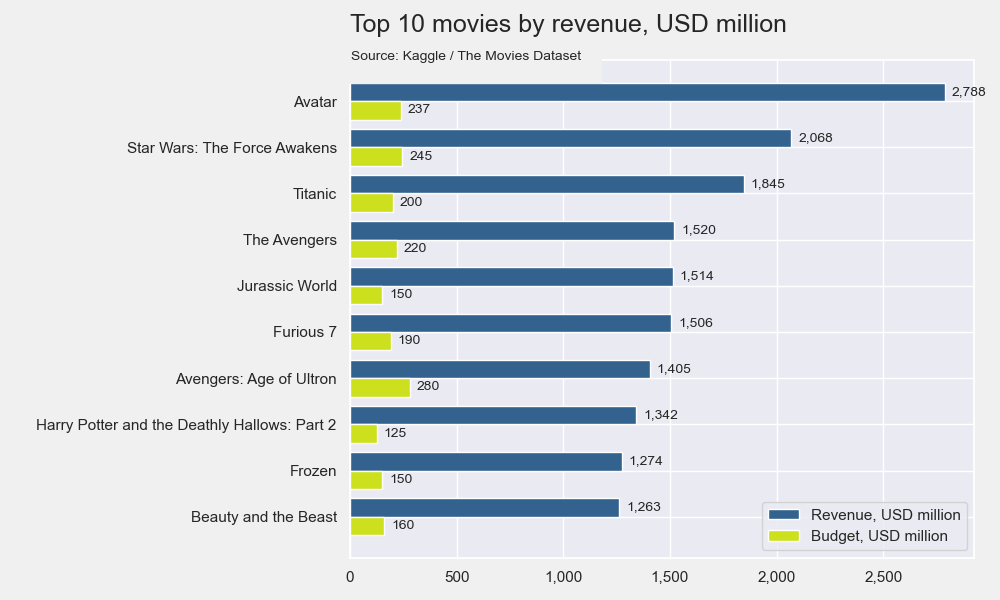

([<matplotlib.axis.YTick at 0x11a9f0a0>,
 <a list of 10 Text major ticklabel objects>)

In [4]:
# Sort values for plotting
ranking.sort_values(by='revenue', inplace=True, ascending=True)

# Plot figure
fig, ax = plt.subplots(figsize=(10,6), facecolor=(.94, .94, .94))
plt.tight_layout()

# Plot double bars
y = np.arange(len(labels))  # the label locations
ax.barh(y + width/2, first_bar, width, label=first_bar_label, color=first_bar_color)
ax.barh(y - width/2, second_bar, width, label=second_bar_label, color=second_bar_color)

# Format ticks
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# Create labels
rects = ax.patches
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 5
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'
    label = '{:,.0f}'.format(x_value)
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords='offset points',
        va='center',                
        ha=ha)            

# Set y-labels and legend
ax.set_yticklabels(labels)
ax.legend()

# To show each y-label, not just even ones
plt.yticks(np.arange(min(y), max(y)+1, 1.0))

# Adjust subplots
plt.subplots_adjust(left=0.35, top=0.9)

# Set title
title = plt.title(plot_title, pad=20, fontsize=title_size)
title.set_position([.35, 1])

# Set subtitle
tform = ax.get_xaxis_transform() 
ann = ax.annotate(subtitle, xy=(5, 1), xycoords=tform, bbox=dict(boxstyle='square, pad=1.5', fc='#f0f0f0', ec='none'))

In [ ]:
plt.savefig(filename+'.png', facecolor=(.94, .94, .94))